# Projet

Groupe : Brenton, Maxime

Cours : Mathematical Foundation for Artificial Intelligence

Date : Mercredi 14 Juin

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tracerPlateau(A):
    n, m = A.shape
    
    plt.xlim(-0.5, n - 0.5)
    plt.ylim(m - 0.5, -0.5)
    
    plt.xticks(np.arange(-0.5, n - 0.5, 1))
    plt.yticks(np.arange(-0.5, m - 0.5, 1))
    plt.tick_params(which = 'major', labelbottom = False, labelleft = False)
    plt.gca().xaxis.tick_top()

    plt.minorticks_on()
    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
    plt.gca().xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))
    plt.gca().yaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))

    plt.tick_params(which = 'minor', top = False, left = False, labeltop = True)

    plt.grid()
    
    N = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == 1])
    B = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == -1])
    if N.shape[0] > 0:
        plt.scatter(N[:, 1], N[:, 0], marker='o', s = 400, c = 'r')
    if B.shape[0] > 0:
        plt.scatter(B[:, 1], B[:, 0], marker='o', s = 400, c = 'b')
    plt.plot()

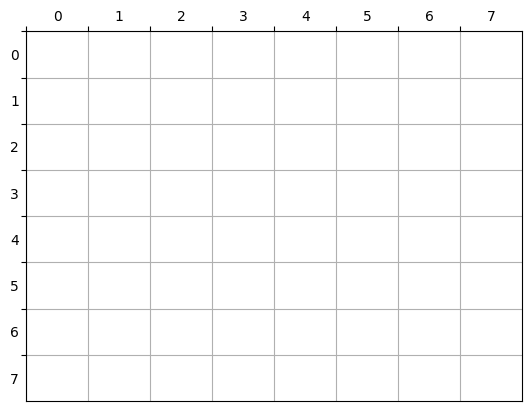

In [3]:
A = np.zeros((8,8), int)
tracerPlateau(A)

## Global Variables 


In [4]:
DIRECTIONS = np.array([[0, 1], [1, 0], [0, -1], [-1, 0],
                       [1, 1], [1, -1], [-1, 1], [-1, -1]])

TAILLE_PLATEAU = [8, 8]

## Fonctions nécessaires

In [5]:
def init_plateau():
    A = np.zeros((TAILLE_PLATEAU[0], TAILLE_PLATEAU[1]), int)
    A[3, 3] = 1
    A[4, 4] = 1
    A[3, 4] = -1
    A[4, 3] = -1
    return A

possible_steps: [[1, 4], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5]], 
possible_steps_changes: [[[4, 4], [3, 4], [2, 4]], [[2, 4]], [[2, 4]], [[3, 4]], [[3, 4]], [[4, 4]], [[3, 4]], [[4, 4]]]


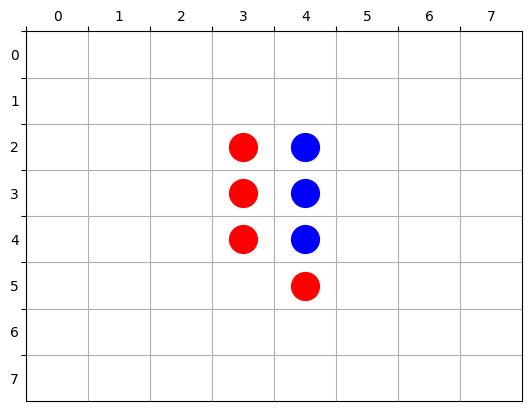

In [6]:
def judge_valide(A, c):
    n, m = A.shape

    possible_steps = []
    possible_steps_changes = []
    
    for i in range(n):
        for j in range(m):
            change_flag = False
            if A[i, j] == 0:
                possible_steps_changes_dir = []
                for step in DIRECTIONS:
                    x, y = i, j # une copy de i, j
                    move = 0
                    changes_correspond_list = []
                    
                    x += step[0]
                    y += step[1]
                    
                    while 0 <= x and x < n and 0 <= y and y < m:
                        if A[x, y] == 0:
                            break
                        
                        if A[x, y] == c:
                            if move > 0:
                                change_flag = True
                                for k in range(1, move + 1):
                                    changes_correspond_list.append([x - k * step[0], y - k * step[1]])
                            break

                        if A[x, y] == -c:
                            x += step[0]
                            y += step[1]
                            move += 1
                            
                        
                    if changes_correspond_list:
                        possible_steps_changes_dir.append(changes_correspond_list)
                
                if possible_steps_changes_dir:    
                    possible_steps_changes.extend(possible_steps_changes_dir)
                
            if change_flag:
                possible_steps.append([i, j])

    return possible_steps, possible_steps_changes

A = init_plateau()
A[2, 3] = 1; A[3, 3] = 1; A[4, 3] = 1; A[2, 4] = -1; A[3, 4] = -1; A[4, 4] = -1; A[5, 4] = 1
tracerPlateau(A)
print(f"possible_steps: {judge_valide(A, 1)[0]}, \npossible_steps_changes: {judge_valide(A, 1)[1]}")

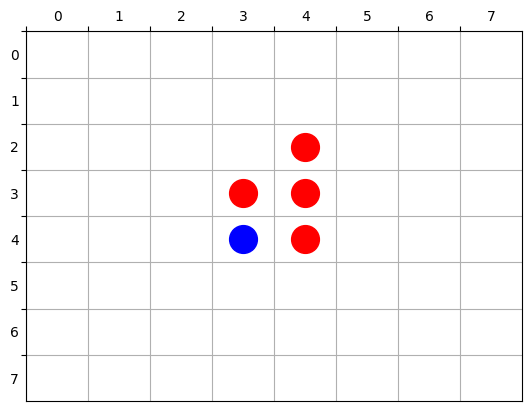

In [7]:
def plateau_changes(A, c, step, changes):
    """
    Vous devez valider si le "step" et les "changes" sont correspondants.
    """
    
    A = A.copy()
    A[step[0], step[1]] = c
    
    for change in changes:
        A[change[0], change[1]] = c
        
    return A

A = init_plateau()
A = plateau_changes(A, 1, judge_valide(A, 1)[0][0], judge_valide(A, 1)[1][0])
tracerPlateau(A)

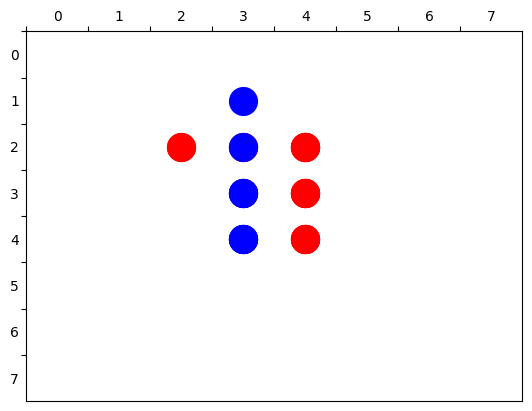

In [8]:
def joue(A, c, x, y):
    A = A.copy()
    coup = [x, y]
    if coup in judge_valide(A, c)[0]:
        A = plateau_changes(A, c, coup, judge_valide(A, c)[1][judge_valide(A, c)[0].index(coup)])
        # judge_valide(A, c)[1] = possible_steps_changes

        tracerPlateau(A)
        
    return A

A = init_plateau()
A = joue(A, 1, 2, 4)
A = joue(A, -1, 2, 3)
A = joue(A, 1, 2, 2)
A = joue(A, -1, 1, 3)


In [9]:
def score(A):
    """Calcule le score d'un plateau de jeu.
    
    Args:
        A (np.array): plateau de jeu.
        
    Returns:
        int: score du plateau de jeu.
    """
    
    n, m = A.shape
    
    N = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == 1])
    B = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == -1])
    return N.shape[0] - B.shape[0]

score(A)

0

([2, 3], -3)

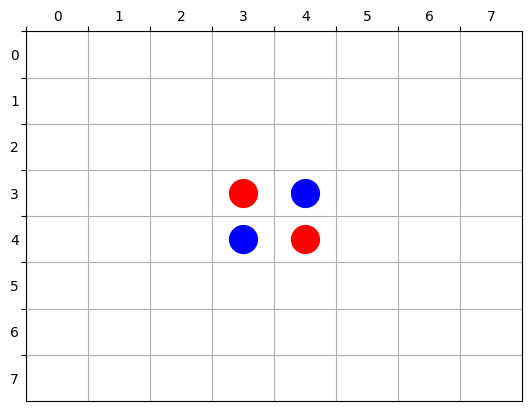

In [10]:
def minmax(A, c, p):
    if p == 0:
        return None, score(A)
    
    possible_steps, possible_steps_changes = judge_valide(A, c)
    if len(possible_steps) == 0:
        return None, score(A)
    
    score_globale = -c * np.inf 
    # Pour couleur = 1, le score_globale est -inf
    # Pour couleur = -1, le score_globale est inf
    
    for coup, changes in zip(possible_steps, possible_steps_changes):
        A_cp = plateau_changes(A, c, coup, changes)
        _, s = minmax(A_cp, -c, p - 1) # s représent le score du plateau de jeu

        if c * s > c * score_globale:
        # c = 1, lorsque s > score_globale (init -inf), update
        # c = -1, lorsque s < score_globale (init +inf), update
            score_globale = s
            coup_optimal = coup
            
    return coup_optimal, score_globale

    
A = init_plateau()

tracerPlateau(A)
minmax(A, -1, 7)

## Coup_Suivant

In [13]:
def coup_suivant(A, c, p=3):
    global game_status # le jeu continue si game_status = True, sinon il est terminé
    A = A.copy()
    
    """
    Trouver tous les coups possibles pour un joueur. (Probablement n'est pas nécessaire)
    """
    
    possible_steps, possible_steps_changes = judge_valide(A, c)
    if len(possible_steps) == 0:
        game_status = False
        
    """
    En utilisant l'algorithme Minimax pour trouver le meilleur coup.
    """
    
    coup, _ = minmax(A, c, p)
    
    """
    Mettre à jour le plateau de jeu.
    """

    for num, step in enumerate(possible_steps):
        if coup == step:
            change = possible_steps_changes[num]
        
    A = plateau_changes(A, c, coup, change)
    # print(coup)
    return A

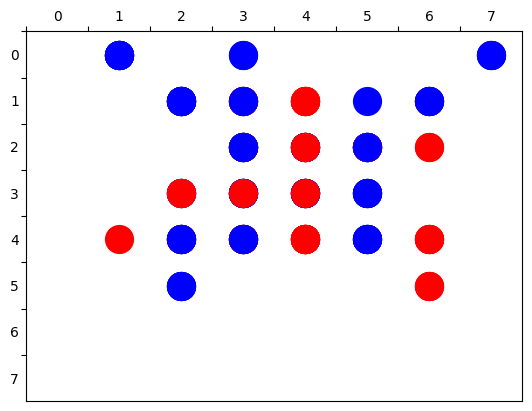

In [14]:
A = init_plateau()
for fois in range(10):
    A = coup_suivant(A, 1)
    A = coup_suivant(A, -1)
    tracerPlateau(A)